# Linear Regression with Real Data

## Boilerplate

In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

2023-04-04 13:54:23.455693: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-04 13:54:23.457372: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 13:54:23.495329: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 13:54:23.496735: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 13:54:24.109870: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Setup

In [2]:
housing_data_src = 'https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv'

dataframe = pd.read_csv(filepath_or_buffer=housing_data_src)
dataframe['median_house_value'] /= 1000.0

dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [3]:
dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [7]:
def build_model(learning_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1, )))
    model.compile(
        optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=learning_rate),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
        loss="mean_squared_error",
    )
    return model

def train_model(model, feature, label, epochs, batch_size):
    history = model.fit(
        batch_size=batch_size,
        x=dataframe[feature],
        y=dataframe[label],
        epochs=epochs,
    )

    weight = model.get_weights()[0]
    bias = model.get_weights()[1]
    epochs = history.epoch

    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return weight, bias, epochs, rmse

def plot_model(weight, bias, feature, label):
    plt.xlabel('feature')
    plt.ylabel('label')

    sample = dataframe.sample(n=200)
    plt.scatter(sample[feature], sample[label])

    x0 = 0
    x1 = sample[feature].max()

    y0 = bias
    y1 = y0 + weight * x1

    plt.plot([x0, x1], [y0, y1], c='r')
    plt.show()

def plot_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min() * 0.97, rmse.max()])

    plt.show()

In [16]:
dataframe.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


Epoch 1/18
5667/5667 [==============================] - 5s 844us/step - loss: 10002.2061 - root_mean_squared_error: 100.0110
Epoch 2/18
5667/5667 [==============================] - 6s 1ms/step - loss: 7022.6323 - root_mean_squared_error: 83.8011
Epoch 3/18
5667/5667 [==============================] - 6s 1ms/step - loss: 7020.6504 - root_mean_squared_error: 83.7893
Epoch 4/18
5667/5667 [==============================] - 7s 1ms/step - loss: 7026.3311 - root_mean_squared_error: 83.8232
Epoch 5/18
5667/5667 [==============================] - 6s 1ms/step - loss: 7027.0254 - root_mean_squared_error: 83.8274
Epoch 6/18
5667/5667 [==============================] - 7s 1ms/step - loss: 7026.4531 - root_mean_squared_error: 83.8239
Epoch 7/18
5667/5667 [==============================] - 7s 1ms/step - loss: 7025.3203 - root_mean_squared_error: 83.8172
Epoch 8/18
5667/5667 [==============================] - 7s 1ms/step - loss: 7025.2886 - root_mean_squared_error: 83.8170
Epoch 9/18
5667/5667 [======

/home/icorbrey/.local/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


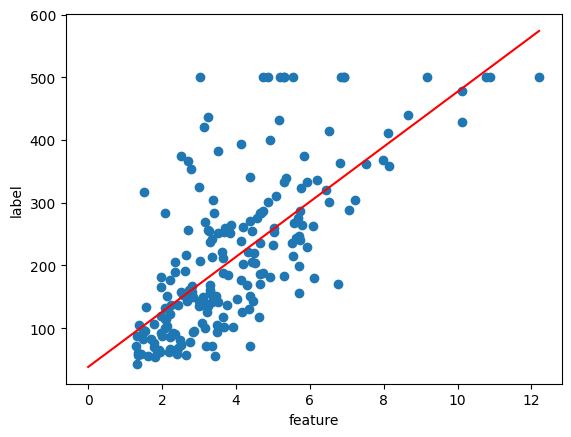

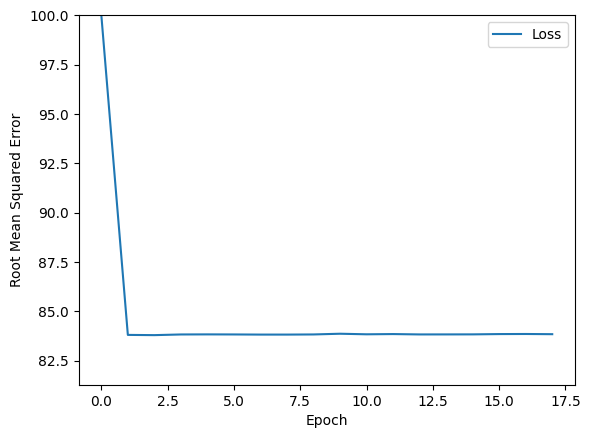

In [17]:
learning_rate = 0.05
epochs = 18
batch_size = 3

# dataframe['rooms_per_person'] = dataframe['total_rooms'] / dataframe['population']

feature = 'median_income'
label = 'median_house_value'

model = None
model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, feature, label, epochs, batch_size)

print()
print('Weight :', weight)
print('Bias   :', bias)

plot_model(weight, bias, feature, label)
plot_loss_curve(epochs, rmse)

In [19]:
def predict_house_values(n, feature, label):
    batch = dataframe[feature][10000:10000 + n]
    values = model.predict_on_batch(batch)

    print('feature  label           predicted')
    print('----------------------------------')
    for i in range(n):
        print('%5.0f %6.0f %15.0f' % (
            dataframe[feature][10000 + i],
            dataframe[label][10000 + i],
            values[i][0]
        ))

predict_house_values(10, feature, label)

feature  label           predicted
----------------------------------
    2     53             133
    4     92             213
    3     69             153
    2     62             130
    3     80             153
    2    295             147
   10    500             467
    5    342             263
    2    118             146
    4    128             223


2023-04-04 14:45:53.760541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [10,1]
	 [[{{node Placeholder/_0}}]]
